In [9]:
!pip install torch torchvision nltk --quiet

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.utils as vutils
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import numpy as np
import random

In [11]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
# Step 2: Text Preprocessing
def preprocess_text(text):
    text = text.lower()
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return tokens

In [13]:
# Step 3: Load GloVe embeddings
import urllib.request
import zipfile
import os

In [14]:
if not os.path.exists('glove.6B.50d.txt'):
    urllib.request.urlretrieve('http://nlp.stanford.edu/data/glove.6B.zip', 'glove.6B.zip')
    with zipfile.ZipFile('glove.6B.zip', 'r') as zip_ref:
        zip_ref.extract('glove.6B.50d.txt')

def load_glove_embeddings(path='glove.6B.50d.txt'):
    embeddings = {}
    with open(path, 'r', encoding='utf-8') as f:
        for line in f:
            parts = line.strip().split()
            word = parts[0]
            vector = np.array(parts[1:], dtype=np.float32)
            embeddings[word] = vector
    return embeddings

glove = load_glove_embeddings()

def text_to_embedding(text, glove_dict, dim=50):
    tokens = preprocess_text(text)
    vectors = [glove_dict.get(tok, np.zeros(dim)) for tok in tokens]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(dim)

In [15]:
class Generator(nn.Module):
    def __init__(self, noise_dim=100, text_embed_dim=50, image_size=64):
        super(Generator, self).__init__()
        self.fc1 = nn.Linear(noise_dim + text_embed_dim, 256)
        self.fc2 = nn.Linear(256, 512)
        self.fc3 = nn.Linear(512, 1024)
        self.fc4 = nn.Linear(1024, image_size * image_size)
        self.image_size = image_size

    def forward(self, noise, text_embedding):
        x = torch.cat([noise, text_embedding], dim=1)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.tanh(self.fc4(x))  # output scaled between -1 and 1
        x = x.view(-1, 1, self.image_size, self.image_size)  # grayscale image
        return x

In [16]:
# Step 5: Simple Discriminator (not conditioned here for simplicity)
class Discriminator(nn.Module):
    def __init__(self, image_size=64):
        super(Discriminator, self).__init__()
        self.fc1 = nn.Linear(image_size * image_size, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 1)

    def forward(self, img):
        x = img.view(img.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

In [17]:
# Step 6: Training setup (toy example)

device = torch.device("cpu")

G = Generator().to(device)
D = Discriminator().to(device)

criterion = nn.BCELoss()
lr = 0.0002
optimizerD = optim.Adam(D.parameters(), lr=lr)
optimizerG = optim.Adam(G.parameters(), lr=lr)

batch_size = 8
noise_dim = 100
text_embed_dim = 50
image_size = 64

# Generate some "real" dummy images (random noise for demo)
def get_real_images(bs):
    # Here: generate random noise images as dummy "real"
    return torch.randn(bs, 1, image_size, image_size)

In [18]:
# Step 7: Training loop (very short for demo)
num_epochs = 300

print("Training GAN on dummy data (this may take ~30 seconds)...")

for epoch in range(num_epochs):
    # Train Discriminator
    D.zero_grad()

    real_imgs = get_real_images(batch_size).to(device)
    label_real = torch.ones(batch_size, 1).to(device)
    output_real = D(real_imgs)
    loss_real = criterion(output_real, label_real)

    noise = torch.randn(batch_size, noise_dim).to(device)
    # Random text embeddings for fake images during training
    random_text_embeds = torch.randn(batch_size, text_embed_dim).to(device)
    fake_imgs = G(noise, random_text_embeds)
    label_fake = torch.zeros(batch_size, 1).to(device)
    output_fake = D(fake_imgs.detach())
    loss_fake = criterion(output_fake, label_fake)

    lossD = loss_real + loss_fake
    lossD.backward()
    optimizerD.step()

    # Train Generator
    G.zero_grad()
    label_gen = torch.ones(batch_size, 1).to(device)  # try to fool discriminator
    output_gen = D(fake_imgs)
    lossG = criterion(output_gen, label_gen)
    lossG.backward()
    optimizerG.step()

    if epoch % 100 == 0:
        print(f"Epoch [{epoch}/{num_epochs}]  Loss_D: {lossD.item():.4f}  Loss_G: {lossG.item():.4f}")

print("Training complete!")

Training GAN on dummy data (this may take ~30 seconds)...
Epoch [0/300]  Loss_D: 1.3513  Loss_G: 0.7026
Epoch [100/300]  Loss_D: 0.6579  Loss_G: 0.7448
Epoch [200/300]  Loss_D: 1.9981  Loss_G: 0.3234
Training complete!


In [3]:
import random
import numpy as np
import torch
import matplotlib.pyplot as plt


In [ ]:
!pip install torch matplotlib --quiet

In [6]:
import torch
import torch.nn as nn
import numpy as np
import random
import matplotlib.pyplot as plt


In [7]:
class Generator(nn.Module):
    def __init__(self, noise_dim=100, text_embed_dim=50, image_size=64):
        super(Generator, self).__init__()
        self.fc1 = nn.Linear(noise_dim + text_embed_dim, 256)
        self.fc2 = nn.Linear(256, 512)
        self.fc3 = nn.Linear(512, 1024)
        self.fc4 = nn.Linear(1024, image_size * image_size)
        self.image_size = image_size

    def forward(self, noise, text_embedding):
        x = torch.cat([noise, text_embedding], dim=1)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.tanh(self.fc4(x))  # output scaled between -1 and 1
        x = x.view(-1, 1, self.image_size, self.image_size)
        return x

# Initialize model
G = Generator()
G.eval()  # Set to eval mode (no training)

Generator(
  (fc1): Linear(in_features=150, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=1024, bias=True)
  (fc4): Linear(in_features=1024, out_features=4096, bias=True)
)

Enter a text prompt: a happy dog


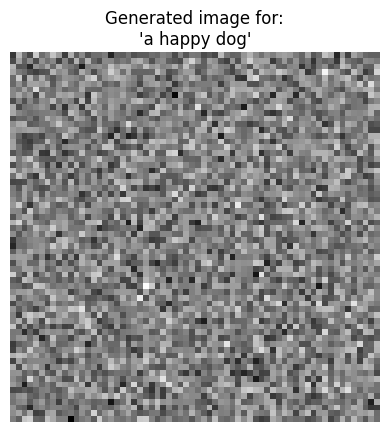

In [19]:
# Step 8: Generate image conditioned on user text
user_prompt = input("Enter a text prompt: ")

# Simulate embedding instead of using GloVe (faster)
random.seed(hash(user_prompt) % (2**32))
np.random.seed(hash(user_prompt) % (2**32))
text_embedding_np = np.random.normal(0, 1, size=(50,))
text_embedding = torch.tensor(text_embedding_np, dtype=torch.float32).unsqueeze(0)

noise = torch.randn(1, 100)
with torch.no_grad():
    fake_image = G(noise, text_embedding).cpu()

# Rescale for display
fake_image = (fake_image + 1) / 2

plt.imshow(fake_image.squeeze(), cmap='gray')
plt.axis('off')
plt.title(f"Generated image for:\n'{user_prompt}'")
plt.show()